### Introduction

A neuron's job is to fire. If it does not fire, or emit action potentials, synaptic modifications takes place until the neuron is activated more frequently. However, neurons have limited resources and must dedicate them to the most productive synapses. The numerous machanisms of synaptic plasticity, from synaptic growth and pruning to the subtle changes in neurotransmitter and receptor levels, all work in concert to ensure the neuron is activated. This results in 'pattern recognition' behavior. In other words, the neuron changes its synaptic preferences such that a certain frequently occuring stimulus, or collection of stimuli, activate the neuron more, relative to other stimuli. How does a neuron identify a frequently ocuring stimulus and subsequently tune its internal biochemistry such that exposure to the stimulus leads to activation? 

Below we provide a proof that a traditional Hebbian plasticity learning rule is minimizing an upper bound of the alpha divergence between the neuron and the distribution generating the stimuli. Modeling a neuron as a radial basis function, we will see that Hebbian plasticity leads to 'mode seeking' behavior. In other words, a neuron is seeking a pocket of high probability density in the data generating distribution. This permits a rather natural definition of a 'feature' as being a local extrema in the data generating distribution. This definition also captures the intrinsic subjectivity of what a feature can be. Certain tasks operating on the same distribution may identify different features as being useful - in both cases though, these features may be characterized as being local extrema.

### $\alpha$-Divergence

Divergences are information theoretic measures for quantifying the similarity between distributions. The alpha divergence is a generalization of the popular Kullback-Leibler (KL) divergence. More precisely, it is a family of divergences specified by the parameter $\alpha$. The forward and reverse KL divergences are special cases of the $\alpha$-divergence for $\alpha=1$ and $\alpha=0$ respectively and $\alpha=0.5$ is the Hellinger distance. The $\alpha$-divergence between two distributions $P(x)$ and $Q(x)$ is calculated using their probability density functions (pdf) $p(x)$ and $q(x)$.

\begin{align}
D_\alpha(p||q) = \frac{1}{\alpha(1-\alpha)} \int_x \alpha p(x) +(1-\alpha)q(x)-p(x)^{\alpha}q(x)^{1-\alpha}dx
\end{align}

For a thorough review of the properties of the $\alpha$-divergence and their associated proofs, see [Proofs of Alpha Divergence Properties](https://www.ece.rice.edu/~vc3/elec633/proof_alpha_divergence.pdf). Let us model a neuron as a radial basis function. In particular, we choose a gaussian pdf denoted by $q(x)$ rendering it more amenable to information theoretic analysis. Furthermore, assume we have a data generating distribution $P(x)$ where i.i.d. $x_i \sim P$ are presented to the neuron $q(x_i)$. After the neuron has observed the point $x_i$ it will update its parameters $\mu$, $\Sigma$ based on some learning rules. Following any observation $x_i$ we can measure how similar our neuron's model $q(x|\mu_i,\Sigma_i)\equiv q_i(x)$ is to the data generating distribution $P(x)$. This can be done with the $\alpha$-divergence.

\begin{align}
D_\alpha(p||q_i) = \frac{1}{\alpha(1-\alpha)} \int_x \alpha p(x) +(1-\alpha)q_i(x)-p(x)^{\alpha}q_i(x)^{1-\alpha}dx
\end{align}



where $p(x)$ is the pdf of the data generating distribution. It is natural to ask which values of $\mu$ and $\Sigma$ allow $q(x)$ to minimize $D_\alpha(p||q)$. The answer depends on which value of $\alpha$ we choose. A range of possible minima are presnted in the figure below.

![title](alpha_divergence.png)

As we can see, minimization of $D_\alpha(p||q)$ with respect to $\mu$ and $\Sigma$ for $\alpha \le 0$ leads qualitatively to mode seeking behavior. Therefore a simple learning rule designed to minimize the $\alpha$-divergence for $\alpha \le 0$ would produce the desired long-term behavior. However, we are confronted with a problem. The data generating distribution $P(x)$, colloquially the world or universe, is unknown. As a result we do not know the density $p(x)$ and are unable to analytically minimize $D_\alpha(p||q)$. However, by identifying that $D_\alpha(p||q)$ is valid for unnormalized distributions and constraining the values of $\alpha$ we can derive an upper bound that is an expectation over $p(x)$ and minimize it as a surrogate with stochastic approximation techniques.

To see this, let us begin by extracting one $p(x)$ from the term $p(x)^{\alpha}$ in the $\alpha$-divergence above

$$D_\alpha(p||q) = \frac{1}{\alpha(1-\alpha)} \int_x \alpha p(x) +(1-\alpha)q(x)-p(x)p(x)^{\alpha-1}q(x)^{1-\alpha}dx$$

Because $D_\alpha$ holds for all $\alpha$ and unnormalized $p(x)$ if we divide $p(x)$ by its maximum such that $\frac{p(x)}{p_{max}}\equiv \bar{p}(x)\le1$ and constrain $\alpha \lt 0$ then we have

$$\bar{p}(x)^{\alpha-1}\ge1$$

In addition, for $\alpha \lt 0$ the leading factor $\frac{1}{\alpha(1-\alpha)}\lt0$

The factor $\bar{p}(x)^{\alpha-1}$ is present in the only negative term in the $\alpha$-divergence. As it is no less than one, by removing it $D_\alpha(\bar{p}||q)$ will either increase or remain unchanged. This produces an upper bound on the $\alpha$-divergence.

$$D_\alpha(\bar{p}||q) \le \frac{1}{\alpha(1-\alpha)} \int_x \alpha \bar{p}(x) +(1-\alpha)q(x)-\bar{p}(x)q(x)^{1-\alpha}dx$$

As we will show later on, the final update equations we arrive at can also be found for $\alpha=0$ by minimizing a similar upper bound for the reverse KL divergence. At first glance this does not seem to have helped our situation as the unknown density $\bar{p}(x)$ is still present. However the aid it provided will become evident as we continue with traditional optimization. For notational brevity let us define $\theta = (\mu, \Sigma)$ and the upper bound as 

\begin{align}
J_\alpha(\bar{p}||q) = \frac{1}{\alpha(1-\alpha)} \int_x \alpha \bar{p}(x) +(1-\alpha)q(x)-\bar{p}(x)q(x)^{1-\alpha}dx
\end{align}

Then the derivative of the upper bound with respect to $\theta$ is

\begin{align}
\frac{d J_\alpha(\bar{p}||q)}{d\theta} = \frac{1}{\alpha} \bigg( \int_x \frac{d q(x)}{d \theta}dx - \int_x \bar{p}(x)q(x)^{-\alpha}\frac{d q(x)}{d \theta}dx \bigg)
\end{align}

For the first integral, we are able to analytically integrate the derivative of our gaussian which we will now show is equal to the zero vector.
We first recall the partials of the multivariate gaussian pdf for both the mean $\mu$ and the covariance $\Sigma$.

\begin{align}
\frac{\partial q}{\partial \mu} &= q(x) \Sigma^{-1} (x-\mu) \\
\frac{\partial q}{\partial \Sigma} &= q(x) \frac{1}{2}\big[\Sigma^{-1}(x-\mu)(x-\mu)^T\Sigma^{-1}-\Sigma^{-1}\big] \\
\end{align}

With these we can calculate $\int_x \frac{d q(x)}{d \theta}dx$.

\begin{align}
\int_x \frac{\partial q}{\partial \mu}dx &= \int_x q(x) \Sigma^{-1} (x-\mu)dx \\
&= \Sigma^{-1} \bigg(\int_x q(x) x dx - \mu \int_x q(x) dx \bigg)\\
&= \Sigma^{-1} \big(\mu - \mu \big) \\
&= 0\\
\end{align}


We next calculate the integral of $\frac{\partial q}{\partial \Sigma}$

\begin{align}
\int_x \frac{\partial q}{\partial \Sigma}dx &= \int_x q(x) \frac{1}{2}\big[\Sigma^{-1}(x-\mu)(x-\mu)^T\Sigma^{-1}-\Sigma^{-1}\big]dx \\
&=  \frac{1}{2}\int_x q(x) \Sigma^{-1}(x-\mu)(x-\mu)^T\Sigma^{-1} dx -\frac{1}{2}\Sigma^{-1} \\
&= \frac{1}{2}\Sigma^{-1}\bigg(\int_x q(x) (x-\mu)(x-\mu)^T dx \bigg) \Sigma^{-1} -\frac{1}{2}\Sigma^{-1} \\
&=  \frac{1}{2}\Sigma^{-1}\Sigma \Sigma^{-1} -\frac{1}{2}\Sigma^{-1} \\
&=  \frac{1}{2}\Sigma^{-1} -\frac{1}{2}\Sigma^{-1}\\
&= 0
\end{align}

We now rewrite the upper bound with zero in place of the first integral and we replace $\bar{p}(x)$ with the original scaled $p(x)/p_{max}$.

$$\frac{d J_\alpha(\bar{p}||q)}{d\theta} = -\frac{1}{\alpha} \int_x \frac{p(x)}{p_{max}}q(x)^{-\alpha}\frac{d q(x)}{d \theta}dx$$

We now factor out the $\frac{1}{p_{max}}$ and use the law of the unconscious statistician (LOTUS) to rewrite the derivative of the upper bound as

\begin{align}
\frac{d J_\alpha(\bar{p}||q)}{d\theta} &= -\frac{1}{\alpha p_{max}} \int_x p(x)q(x)^{-\alpha}\frac{d q(x)}{d \theta}dx\\
&= -\frac{1}{\alpha p_{max}} \mathbb{E}_{P} \bigg[q(x)^{-\alpha}\frac{d q(x)}{d \theta}\bigg]\\
\end{align}

Lastly we substitute the partials of $q(x)$ to see both components

\begin{align}
\frac{\partial J_\alpha(\bar{p}||q)}{\partial \mu} &= -\frac{1}{\alpha p_{max}} \mathbb{E}_{P} \big[q(x)^{-\alpha}\frac{\partial q}{\partial \mu}\big] \\
&= -\frac{1}{\alpha p_{max}} \mathbb{E}_{P} \big[q(x)^{-\alpha}q(x) \Sigma^{-1} (x-\mu) \big] \\
&= -\frac{\Sigma^{-1}}{\alpha p_{max}} \mathbb{E}_{P} \big[q(x)^{1-\alpha}(x-\mu) \big]
\end{align}

If the expectation in the above expression equals zero, then then entire partial derivative is zero. Furthermore, if $\Sigma$ is invertible then it is the only way the partial can be zero.

\begin{align}
\frac{\partial J_\alpha(\bar{p}||q)}{\partial \Sigma} &= -\frac{1}{\alpha p_{max}} \mathbb{E}_{P} \big[q(x)^{-\alpha}\frac{\partial q}{\partial \Sigma}\big] \\
&= -\frac{1}{\alpha p_{max}} \mathbb{E}_{P} \big[q(x)^{-\alpha}(-q(x) \frac{1}{2}\big[\Sigma^{-1}-\Sigma^{-1}(x-\mu)(x-\mu)^T\Sigma^{-1})\big] \\
&= -\frac{\Sigma^{-1}}{2 \alpha p_{max}} \mathbb{E}_{P} \big[ q(x)^{1-\alpha} [(x-\mu)(x-\mu)^T-\Sigma] \big]\Sigma^{-1}
\end{align}

As it was for $\frac{\partial J_\alpha(\bar{p}||q)}{\partial \mu}$, provided $\Sigma$ is invertible the expectation being zero is the only way for $\frac{\partial J_\alpha(\bar{p}||q)}{\partial \Sigma}$ to be zero.

### The Upper Bound

Before we begin exploring convergence properties and the dynamics of the underlying system, let us examine the upper bound $J_\alpha(p||q)$.

$$J_\alpha(\bar{p}||q) = \frac{1}{\alpha(1-\alpha)} \int_x \alpha \bar{p}(x) +(1-\alpha)q(x)-\bar{p}(x)q(x)^{1-\alpha}dx$$

To build intuition about how the upper bound behaves we will visualize the entire surface in a low dimensional and easy to understand example. Let us define the data generating distribution as

$$p(x) = \frac{2}{5}N(\frac{1}{2},0.1)+\frac{3}{5}N(\frac{7}{10}, 0.05)$$

We also define the magnitude constrained $p(x)$ as

$$\bar{p}(x) = \frac{1}{p_{max}}\bigg(\frac{2}{5}N(\frac{1}{2},0.1)+\frac{3}{5}N(\frac{7}{10}, 0.05)\bigg)$$

and the neuron as

$$q(x) = N(\frac{1}{5},0.005)$$

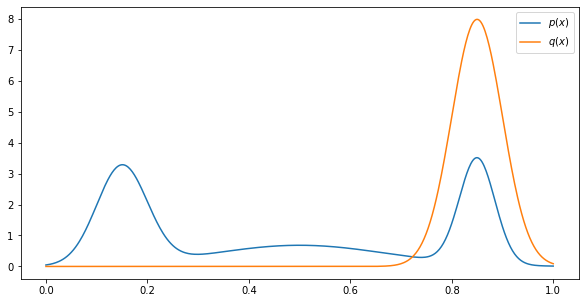

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from OldBrain import Neuron, GMM
import warnings
warnings.filterwarnings('ignore')

p_mean = 0.5
p_sig = 0.175
p = GMM([0.4,0.3,0.3], np.array([[0.15,0.05],[0.85,0.035],[p_mean,p_sig]]))
#p = GMM([1.0], np.array([[p_mean,p_sig]]))
q = GMM([1.0], np.array([[0.85,0.05]]))
lims = [0,1]
x_vals = np.linspace(lims[0],lims[1],500)
p_vals = p(x_vals)
q_vals = q(x_vals)
fig = plt.figure(figsize=(10,5))
plt.plot(x_vals, p_vals, label="$p(x)$")
plt.plot(x_vals, q_vals, label="$q(x)$")
plt.legend()
plt.show()

We will approximate the integral in $J_{\alpha_0}(\bar{p}||q(x|\mu,\sigma^2))$ and $D_{\alpha_0}(p||q(x|\mu,\sigma^2))$ with a gaussian quadrature.

In [12]:
from scipy.integrate import quadrature
def D(mu,sig,a):
    q = GMM([1.0], np.array([[mu,sig]]))
    def d_i(x):
        global p
        q_i = q(x)
        p_i = p(x)
        return a*p_i + (1-a)*q_i - np.power(p_i,a)*np.power(q_i,1-a)
    quad_rslt, quad_err = quadrature(d_i, lims[0], lims[1], maxiter=200)
    return (quad_rslt/(a*(1-a)), quad_err)

def J_old(mu,sig,a):
    q = GMM([1.0], np.array([[mu,sig]]))
    def j_old(x):
        global p
        q_i = q(x)
        p_i = p(x)
        return a*p_i + (1-a)*q_i - p_i*np.power(q_i,1-a)
        #return p_i + q_i - p_i*np.power(q_i,1-a)
    quad_rslt, quad_err = quadrature(j_old, lims[0], lims[1], maxiter=200)
    return (quad_rslt/(a*(1-a)), quad_err)
    #return (quad_rslt, quad_err)
    
def J_new(mu,sig):
    q = GMM([1.0], np.array([[mu,sig]]))
    def j_new(x):
        global p
        q_i = q(x)
        #log_q_i = -0.5*(np.log(2*np.pi*sig*sig)+np.power((x-mu)/sig,2))
        p_i = p(x)
        #return a*p_i + (1-a)*q_i - p_i*np.power(q_i,1-a)
        #c = np.sqrt(2*np.pi*(p_sig+sig))*np.exp(-0.5*(p_mean-mu)**2/(p_sig+sig))
        return p_i*q_i - p_i + q_i
    quad_rslt, quad_err = quadrature(j_new, lims[0], lims[1], maxiter=200)
    #return (quad_rslt/(a*(1-a)), quad_err)
    return (quad_rslt, quad_err)

def KL(mu,sig):
    q = GMM([1.0], np.array([[mu,sig]]))
    def kl_i(x):
        global p
        q_i = q(x)
        log_q_i = -0.5*(np.log(2*np.pi*sig*sig)+np.power((x-mu)/sig,2))
        p_i = p(x)
        return -q_i*(np.log(p_i)-log_q_i)
    quad_rslt, quad_err = quadrature(kl_i, lims[0], lims[1], maxiter=200)
    return (quad_rslt, quad_err)

It appears that the "upper bound" is not at all an "upper bound". Let us plot all of the integrands along the $x$ axis and investigate

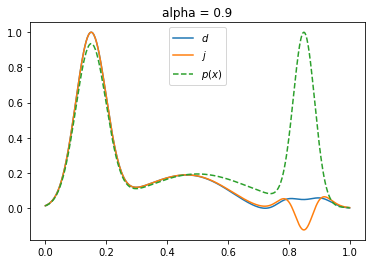

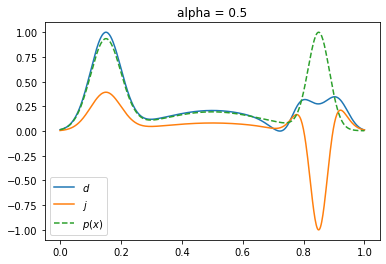

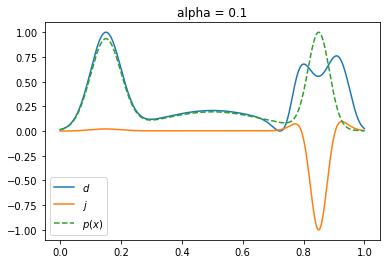

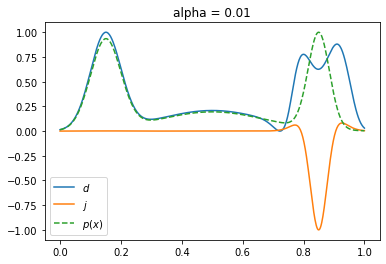

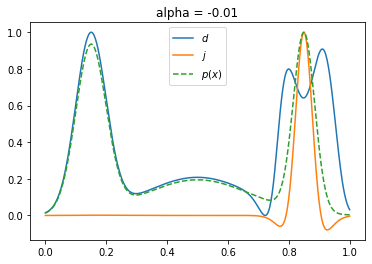

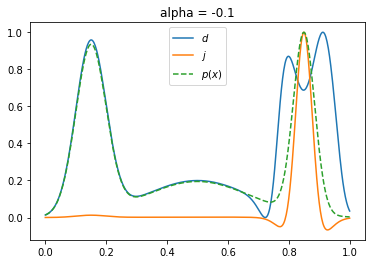

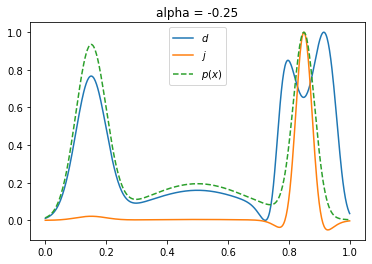

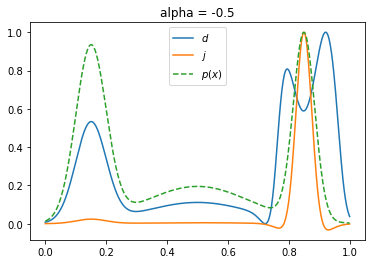

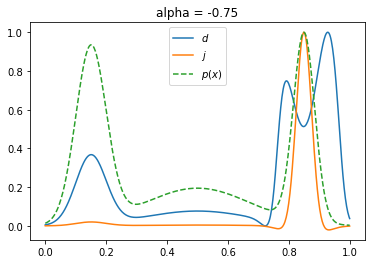

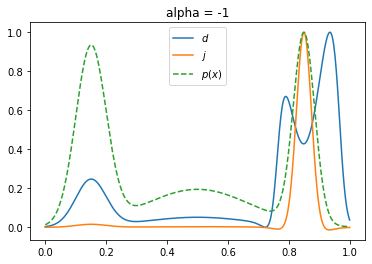

In [3]:
def d_i(x,a):
        global p,q
        q_i = q(x)
        p_i = p(x)
        return (a*p_i + (1-a)*q_i - np.power(p_i,a)*np.power(q_i,1-a))/(a*(1-a))
    
def j_i(x,a):
        global p,q
        q_i = q(x)
        p_i = p(x)
        return (a*p_i + (1-a)*q_i - p_i*np.power(q_i,1-a))/(a*(1-a))
        #return (p_i + q_i - p_i*np.power(q_i,1-a))
    
def ce_i(x,a):
        global p,q
        q_i = q(x)
        p_i = p(x)
        return -p_i*np.log(q_i)

def kl_i(x,a):
        global p,q
        q_i = q(x)
        p_i = p(x)
        return -q_i*np.log(p_i/q_i)
    
all_as =[0.9,0.5,0.1,0.01,-0.01,-0.1,-0.25,-0.5,-0.75,-1]
for a in all_as:
    di_vals = d_i(x_vals,a)
    ji_vals = j_i(x_vals,a)
    plt.plot(x_vals, di_vals/np.abs(di_vals).max(), label='$d$')
    #plt.plot(x_vals, di_vals, label='$d$')
    plt.plot(x_vals, ji_vals/np.abs(ji_vals).max(), label='$j$')
    #plt.plot(x_vals, ji_vals, label='$j$')
    #plt.plot(x_vals, ce_i(x_vals,a)/np.abs(ce_i(x_vals,a)).max(), label='$ce$')
    #plt.plot(x_vals, kl_i(x_vals,a), label='$kl$')
    plt.plot(x_vals, p_vals/p_vals.max(), label="$p(x)$", ls='dashed')
    plt.title("alpha = {}".format(a))
    #plt.ylim([ji_vals.min(), ji_vals.max()])
    #plt.ylim([-0.5, 1.5])


    plt.legend()
    plt.show()


Correct. Unfortunately, I forgot that the lead coefficient in the $\alpha$-divergence $\frac{1}{\alpha(1-\alpha)}$ is always negative for $\alpha \lt 0$. Therefore, $J$ is actually a lower bound of $D$... If that is the case, then why is it that the local minima seem to coincide?

So far, there is still a very strange connection between the true alpha divergence and the pseudo divergence $J$. I would like to explore it further. Let us now look at how both divergences changes for different values of the mean, $\mu$.

<Figure size 432x288 with 0 Axes>

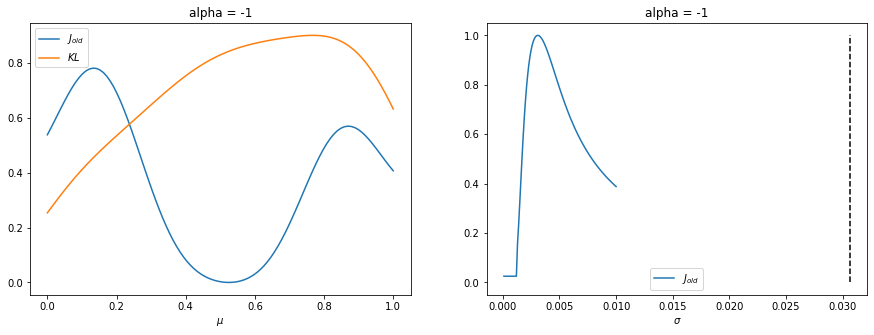

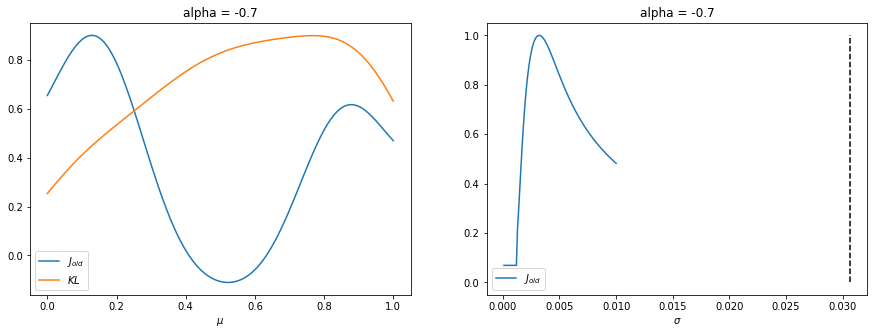

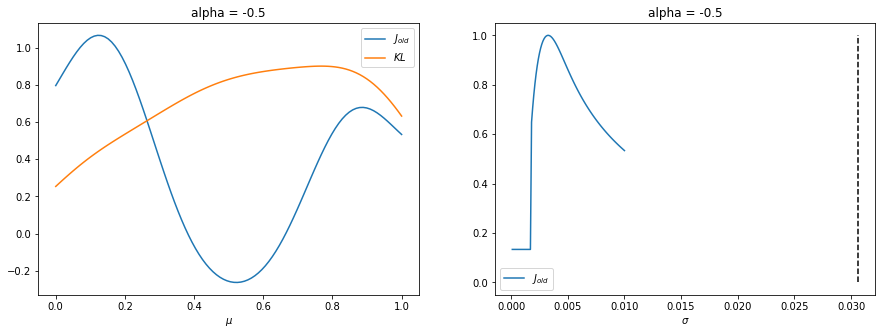

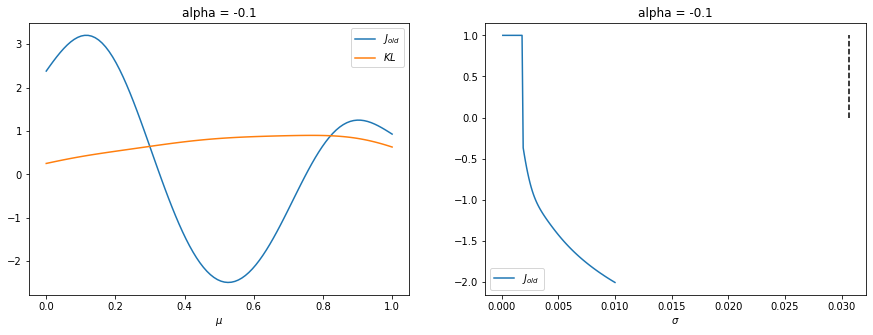

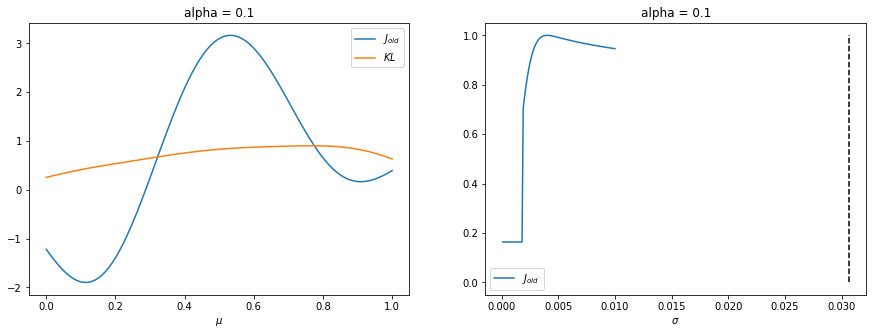

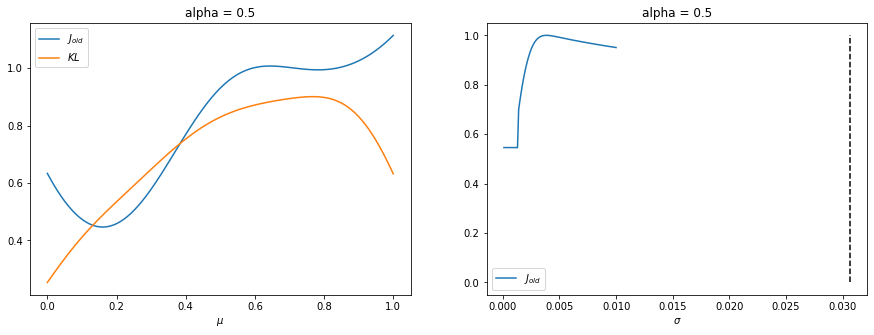

In [4]:
plt.clf()
mus = np.linspace(0,1,100)
sigmas = np.linspace(0.0001,0.01,100)
#all_as =[-0.00001,-0.0001,-0.001,-0.01,-0.1,-1,-1.5,-2,-4]
all_as =[-1,-0.7,-0.5,-0.1,0.1,0.5]
for a in all_as:
    fig = plt.figure(figsize=(15,5))
    jold_mu = []
    kl_mu = []
    for mu in mus:
        jold_mu.append(J_old(mu,p_sig,a)[0])
        kl_mu.append(KL(mu,p_sig)[0])
    ax1 = fig.add_subplot(121)
    ax1.plot(mus, jold_mu, label='$J_{old}$')
    ax1.plot(mus, kl_mu, label='$KL$')
    ax1.set_title("alpha = {}".format(a))
    ax1.set_xlabel('$\mu$')
    ax1.legend()
    jnew_s = []
    jold_s = []
    kl_s = []
    for s in sigmas:
        jold_s.append(J_old(p_mean+0.1,s,a)[0])
        #kl_s.append(KL(p_mean+0.1,s)[0])

    ax2 = fig.add_subplot(122)
    ax2.plot(sigmas, jold_s/np.max(jold_s), label='$J_{old}$')
    #ax2.plot(sigmas, kl_s/np.max(kl_s), label='$KL$')
    ax2.plot([p_sig*p_sig,p_sig*p_sig],[0,1],c='k',ls='dashed')
    ax2.set_title("alpha = {}".format(a))
    ax2.set_xlabel('$\sigma$')
    ax2.legend()
    plt.show()

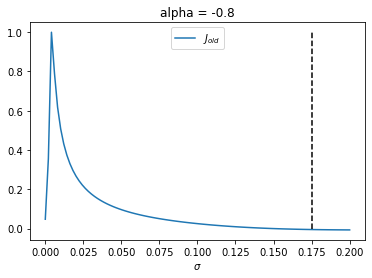

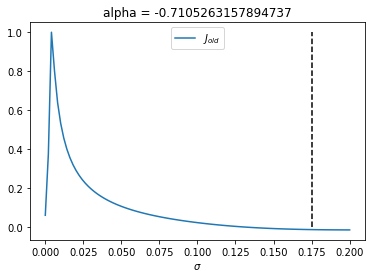

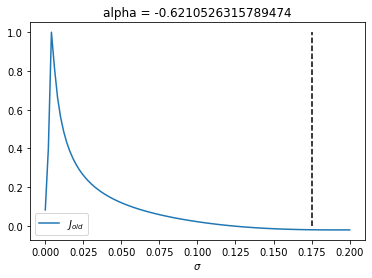

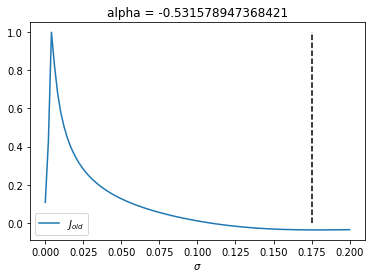

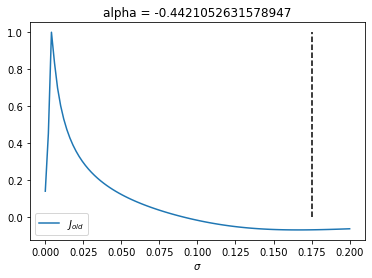

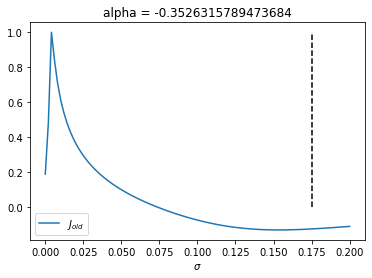

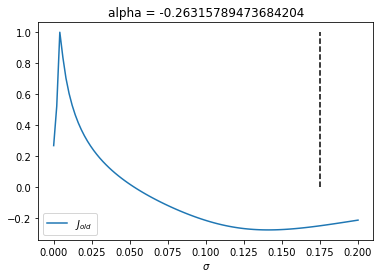

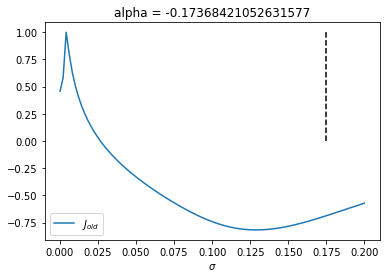

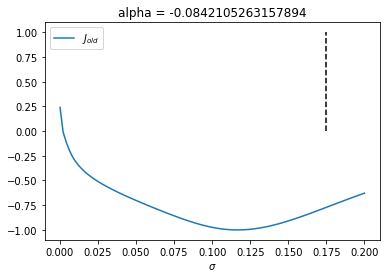

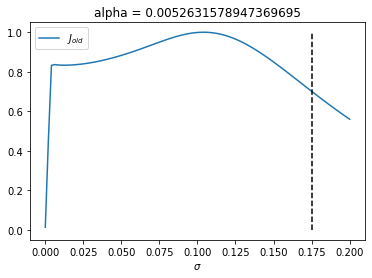

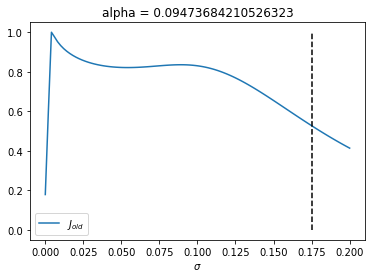

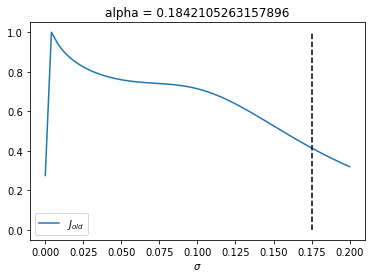

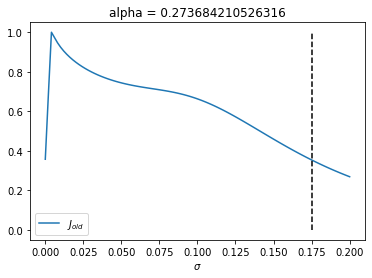

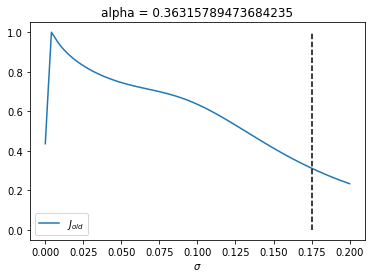

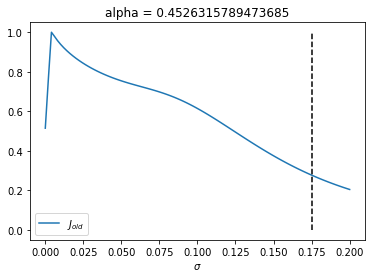

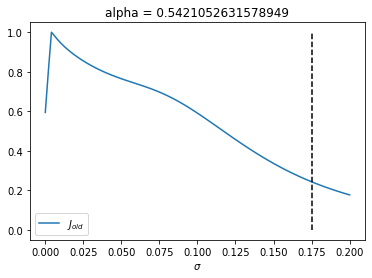

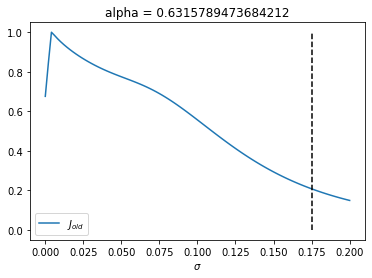

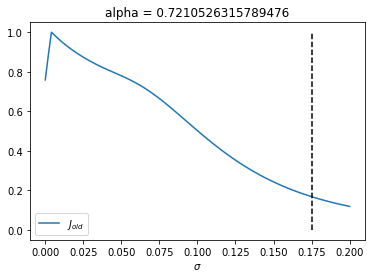

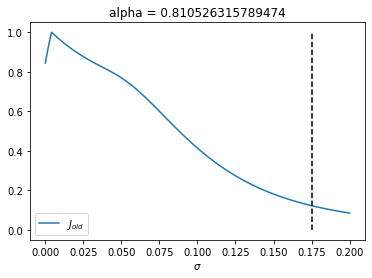

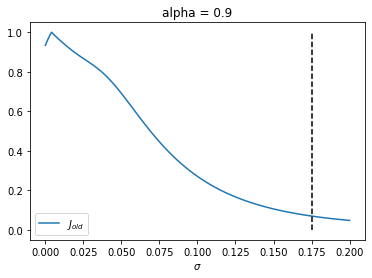

In [5]:
plt.clf()
sigmas = np.linspace(0.0001,0.2,100)
#all_as =[-0.00001,-0.0001,-0.001,-0.01,-0.1,-1,-1.5,-2,-4]
all_as = np.linspace(-0.8,0.9,20)
for a in all_as:
    jold_s = []
    for s in sigmas:
        jold_s.append(J_old(p_mean,s,a)[0])

    plt.plot(sigmas, jold_s/np.max(np.abs(jold_s)), label='$J_{old}$')
    plt.plot([p_sig,p_sig],[0,1],c='k',ls='dashed')
    plt.title("alpha = {}".format(a))
    plt.xlabel('$\sigma$')
    plt.legend()
    plt.show()

In [6]:
sigmas[(np.diff(np.sign(np.diff(jold_s))) > 0).nonzero()[0] + 1]

array([], dtype=float64)

In [7]:
sigmas[(np.diff(np.sign(np.diff(kl_s))) < 0).nonzero()[0] + 1]

array([], dtype=float64)

In [8]:
p_sig*p_sig

0.030624999999999996

Let us now see how close the extrema are between the KL divergence and my proxy divergence

<Figure size 432x288 with 0 Axes>

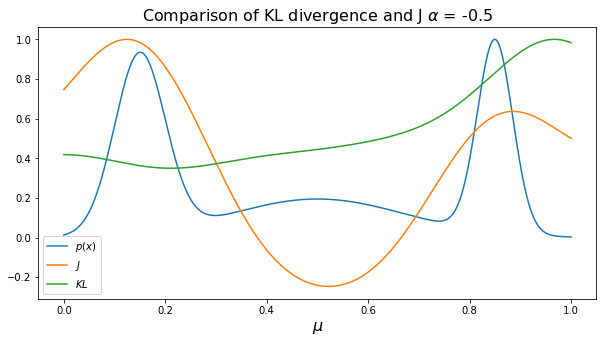

In [13]:
plt.clf()
mus = np.linspace(0,1,500)
a = -0.5
fig = plt.figure(figsize=(10,5))
js_mu = []
kls_mu = []
for mu in mus:
    #q = Neuron([1,1], np.array([mu]), 0.01, 0.025, 1)
    q = Neuron([1,1], np.array([mu]), p_sig*p_sig, 0.025, 1)
    js_mu.append(J_old(mu, p_sig, a)[0])
    kls_mu.append(D(mu,p_sig,a)[0])
p_vals = p(x_vals)
plt.plot(x_vals, p_vals/p_vals.max(), label="$p(x)$")
plt.plot(mus, js_mu/np.max(np.abs(js_mu)), label='$J$')
plt.plot(mus, kls_mu/np.max(np.abs(kls_mu)), label='$KL$')
plt.title(f"Comparison of KL divergence and J $\\alpha$ = {a}", fontsize=16)
plt.xlabel('$\mu$', fontsize=16)

plt.legend()
plt.show()

In [39]:
js_zeros = mus[(np.diff(np.sign(np.diff(js_mu))) < 0).nonzero()[0] + 1]
kls_zeros = mus[(np.diff(np.sign(np.diff(kls_mu))) > 0).nonzero()[0] + 1]

print("js_zeros = ", js_zeros)
print("kls_zeros = ", kls_zeros)

js_zeros =  [0.1503006 0.498998  0.8496994]
kls_zeros =  [0.14829659 0.498998   0.8496994 ]


In [10]:
p_sig**2

0.0012250000000000002

Take the following two equations...

\begin{align}
J_\alpha(p||q) = \frac{1}{\alpha(1-\alpha)} \int_x \alpha p(x) +(1-\alpha)q(x)-p(x)q(x)^{1-\alpha}dx
 && \text{KL}(q || p) = \int_x q(x) \log \frac{q(x)}{p(x)} dx
\end{align}

Let $q(x)$ be the pdf for a Gaussian,
$\mathcal{N}(\mu, \Sigma)$, and $p(x)$ be unknown. I have demonstrated numerically that both equations have the same extrema for $\mu$, for $-1 \lt \alpha \lt 0$. (If you would like to see the notebook for that, I can send it too. For now just assume it is true)

I would now like to show it analytically. I thought it would be relatiely straight forward to take the partials and show that the same $\mu^*$ minimizes both. 

\begin{align}
\frac{\partial J_\alpha}{\partial \mu} &= \frac{1}{\alpha} \int_x q_{\mu}(x)\bigg(1-\frac{p(x)}{q(x)^{\alpha}}\bigg)dx
 && \frac{\partial \text{KL}}{\partial \mu} = & \int_x q_{\mu}(x) \bigg(\log \frac{q(x)}{p(x)}+1 \bigg) dx \\
 \frac{\partial J_\alpha}{\partial \mu} &= \frac{1}{\alpha} \int_x q(x)\Sigma^{-1}(x-\mu)\bigg(1-\frac{p(x)}{q(x)^{\alpha}}\bigg)dx
 && \frac{\partial \text{KL}}{\partial \mu} = & \int_x q(x) \Sigma^{-1}(x-\mu) \bigg(\log \frac{q(x)}{p(x)}+1 \bigg) dx
\end{align}


After observing that $\int_x q_{\mu}(x) dx = 0$, via...


\begin{align}
\int_x q_{\mu}(x) dx &= \int_x q(x) \Sigma^{-1} (x-\mu)dx \\
&= \Sigma^{-1} \bigg(\int_x q(x) x dx - \mu \int_x q(x) dx \bigg)\\
&= \Sigma^{-1} \big(\mu - \mu \big) \\
&= 0\\
\end{align}


and setting both equations to zero, we can see...


\begin{align}
0 = \mathbb{E}_{q} \bigg[\big(1-\frac{p(x)}{q(x)^{\alpha}}\big)(x-\mu) \bigg]
 && 0 = \mathbb{E}_{q} \bigg[ \log \frac{p(x)}{q(x)}(x-\mu) \bigg]
\end{align}


And from here, setting them both equal to zero, we can derive closed form solutions...

\begin{align}
\mu_J = \frac{ \mathbb{E}_{q} \bigg[ \frac{p(x)}{q(x)^{\alpha}}x \bigg]}{\mathbb{E}_{q} \bigg[ \frac{p(x)}{q(x)^{\alpha}} \bigg]}
&& \mu_{KL} = \frac{ \mathbb{E}_{q} \bigg[ \log\big(\frac{p(x)}{q(x)}\big)x \bigg]}{\mathbb{E}_{q} \bigg[ \log\big(\frac{p(x)}{q(x)}\big) \bigg]}
\end{align}

Let us test our formulas as a function of a few parameters. First, $\alpha$...

In [11]:
def mu_j(a):
    def numerator(x):
        global p,q
        q_i = q(np.array(x).reshape(-1,1),update=False)
        p_i = p(x)
        return p_i*np.power(q_i,1-a)*x
    def denominator(x):
        global p,q
        q_i = q(np.array(x).reshape(-1,1),update=False)
        p_i = p(x)
        return p_i*np.power(q_i,1-a)
    num_quad, quad_err = quadrature(numerator, lims[0], lims[1], maxiter=200)
    den_quad, quad_err = quadrature(denominator, lims[0], lims[1], maxiter=200)

    return (num_quad/den_quad, quad_err)
def mu_kl():
    def numerator(x):
        global p,q
        q_i = q(np.array(x).reshape(-1,1),update=False)
        p_i = p(x)
        return q_i*np.log(p_i/q_i)*x
    def denominator(x):
        global p,q
        q_i = q(np.array(x).reshape(-1,1),update=False)
        p_i = p(x)
        return q_i*np.log(p_i/q_i)
    num_quad, quad_err = quadrature(numerator, lims[0], lims[1], maxiter=200)
    den_quad, quad_err = quadrature(denominator, lims[0], lims[1], maxiter=200)

    return (num_quad/den_quad, quad_err)

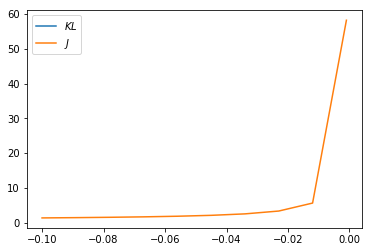

In [12]:
j_vals = []
a=-0.5
a_vals = np.linspace(-0.001,-0.1,10)
q = Neuron([1,1], np.array([0.85]), 0.0001, 0.025, 1)
for a in a_vals:
    j_vals.append(J(a)[0])
kl_vals = [mu_kl()[0]]*len(a_vals)

plt.plot(a_vals, kl_vals, label='$KL$')
plt.plot(a_vals, j_vals, label='$J$')
plt.legend()
plt.show()

In [13]:
j_vals

[58.228124241886064,
 5.64800159377656,
 3.353244849286156,
 2.537653057250618,
 2.1166368516408514,
 1.8577815070433679,
 1.6812981236654556,
 1.5524044651395237,
 1.4535120137924598,
 1.3747683320650408]

For a given $\alpha=\alpha_0$ we will calculate the value of $J_{\alpha_0}(\bar{p}||q(x|\mu,\sigma^2))$ for $0\le \mu \le 1$ and $0 \lt \sigma^2 \le 1$ and visualize the resulting surface, along with the location of the minimum of the $\alpha$-divergence and the upper bound. We will also plot the gaussians that result from those minima.

### Hebbian Learning Rules

Given a neuron $q(x)$ where $x \in {\rm I\!R}^k$ is the input to the neuron, the most fundamental learning rule from Hebb's theory is

$$\Delta w_i = q(x_i)\cdot x_i$$

where $\Delta w_i$ denotes the change made to the $i^{\text{th}}$ synaptic weight. The update is the product of the input and the output. Many generalizations of this learning rule have been studied. (Go into them more in the future). One valid update rule is the Hebb rule with postsynaptic or presynaptic LTP/LTD threshold as follows (chapter 19.2 of Gerstner's [book](https://neuronaldynamics.epfl.ch/online/Ch19.S2.html))

$$\Delta w_i = q(x_i)\cdot (x_i-c)$$

We observe that this is exactly the learning rule derived above from minimizing $J_\alpha(p||q)$, the upperbound of the $\alpha$-divergence.